# Bank Dataset

The bank data set contain more than 1 million rows (or observations) and 24 original columns (or variables). Three target variables are provided, but the primary focus is on the binary target (accounts that contracted at least one product in the previous campaign season).

The bank data set consists of observations taken on a large financial services firm's accounts. Accounts in the data represent consumers of home equity lines of credit, automobile loans, and other types of short- to medium-term credit instruments.

https://github.com/sassoftware/sas-viya-machine-learning/tree/master/data/bank

# Importa Bibliotecas

#### Swat: 
- https://sassoftware.github.io/python-swat/index.html
- https://github.com/sassoftware/python-swat

#### Exemplos:
- https://github.com/sassoftware/sas-viya-programming

In [1]:
from swat import *
from getpass import getpass
import matplotlib.pyplot as plt
%matplotlib inline

# Conecta ao SAS Viya

In [2]:
sas = CAS('localhost', 5570, 'sasdemo', getpass('Please enter your passwod:'))

Please enter your passwod:········


In [31]:
for actionset in ['decisiontree','neuralnet','autotune']:
    sas.loadactionset(actionset)

NOTE: Added action set 'decisiontree'.
NOTE: Added action set 'neuralnet'.
NOTE: Added action set 'autotune'.


# Lista Fontes de Dados

In [3]:
sas.caslibinfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,BANKS,PATH,,/sasdata/banks/,,0.0,0.0,0.0,0.0,0.0,0.0
1,CASUSER(sasdemo),PATH,Personal File System Caslib,/home/sasdemo/casuser/,,1.0,0.0,1.0,1.0,0.0,1.0
2,Examples,PATH,,/sasdata/LG/,,0.0,0.0,0.0,0.0,0.0,0.0
3,Formats,PATH,Stores user defined formats.,/opt/sas/viya/config/data/cas/default/formats/,,0.0,0.0,0.0,0.0,0.0,0.0
4,Invoices,PATH,,/sasdata/invoices/,,0.0,0.0,0.0,0.0,0.0,0.0
5,ModelPerformanceData,PATH,Library for Model Management performance objects.,/opt/sas/viya/config/data/cas/default/modelMon...,,0.0,0.0,0.0,0.0,0.0,0.0
6,Models,PATH,Stores models created by Visual Analytics for ...,/opt/sas/viya/config/data/cas/default/models/,,0.0,0.0,0.0,0.0,0.0,0.0
7,PGDATA,postgres,,,uid = 'sas',0.0,0.0,0.0,0.0,0.0,0.0
8,Public,PATH,"Shared and writeable caslib, accessible to all...",/opt/sas/viya/config/data/cas/default/public/,,0.0,0.0,0.0,0.0,0.0,0.0
9,QASMartStore,PATH,Stores quality analytic suite mart tables.,/opt/sas/viya/config/data/cas/default/qasMartS...,,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sas.addcaslib(name='BANKS',
              path='/sasdata/banks',
              datasource='path',
              session=False)

# Lista Tabelas

In [4]:
sas.tableinfo(caslib='BANKS')

NOTE: No tables are available in caslib BANKS of Cloud Analytic Services.


+ Elapsed: 0.000781s, mem: 0.3mb

# Carrega os Dados

In [5]:
bank = sas.table.loadtable(caslib='BANKS', path='banks.sashdat',
                           casout={'caslib':'BANKS', 'name':'BANK'},
                           promote=True)['casTable']

NOTE: Cloud Analytic Services made the file banks.sashdat available as table BANK in caslib BANKS.


In [6]:
bank.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,cat_input1,Account Activity Level,1,char,5,5,,0,0
1,cat_input2,Customer Value Level,2,char,1,1,,0,0
2,cnt_tgt,Count Number New Products,3,double,8,12,,0,0
3,demog_age,Customer Age,4,double,8,12,,0,0
4,demog_ho,Homeowner Binary,5,double,8,12,,0,0
5,demog_pr,Percentage Retired,6,double,8,12,,0,0
6,int_tgt,Interval New Sales,7,double,8,10,DOLLAR,10,2
7,demog_homeval,Replaced Home Value,8,double,8,12,,0,0
8,demog_inc,Replaced Income,9,double,8,12,,0,0
9,rfm1,Average Sales Past 3 Years,10,double,8,9,DOLLAR,9,2


In [7]:
bank.head()

,cat_input1,cat_input2,cnt_tgt,demog_age,demog_ho,demog_pr,int_tgt,demog_homeval,demog_inc,rfm1,...,rfm7,rfm8,rfm9,rfm10,rfm11,rfm12,demog_genf,demog_genm,account,target
0,Z,C,0.0,NaN,0.0,26.0,NaN,87299.0,NaN,23.0,...,2.0,2.0,22.0,12.0,5.0,22.0,1.0,0.0,100732434,0.0
1,Z,C,0.0,50.0,1.0,32.0,NaN,88768.0,60808.0,15.0,...,2.0,2.0,21.0,9.0,4.0,21.0,0.0,1.0,100732435,0.0
2,Z,C,0.0,55.0,1.0,21.0,NaN,88384.0,60000.0,12.5,...,2.0,2.0,17.0,12.0,6.0,21.0,1.0,0.0,100732436,0.0
3,Z,B,0.0,40.0,0.0,31.0,NaN,105266.0,55329.0,40.0,...,2.0,2.0,18.0,12.0,6.0,18.0,1.0,0.0,100732437,0.0
4,Z,C,0.0,57.0,1.0,31.0,NaN,141292.0,106651.0,12.5,...,3.0,3.0,19.0,13.0,7.0,24.0,1.0,0.0,100732438,0.0


# Análise Descritiva

In [8]:
bank.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,cnt_tgt,0.00,6.00,1060037.0,1.0,0.311756,3.304730e+05,0.699682,0.000680,4.895551e-01,6.219730e+05,5.189460e+05,224.432543,458.748527,0.0,2.399664,5.563220
1,demog_age,-1.00,89.00,793177.0,266861.0,58.716371,4.657248e+07,16.850767,0.018921,2.839484e+02,2.959788e+09,2.252210e+08,28.698585,3103.305833,0.0,-0.359941,-0.501027
2,demog_ho,0.00,1.00,1060038.0,0.0,0.550260,5.832970e+05,0.497468,0.000483,2.474741e-01,5.832970e+05,2.623317e+05,90.405861,1138.843722,0.0,-0.202066,-1.959173
3,demog_pr,0.00,101.00,1060038.0,0.0,30.569372,3.240470e+07,11.526008,0.011195,1.328489e+02,1.131416e+09,1.408247e+08,37.704432,2730.664289,0.0,-0.153946,1.334697
4,int_tgt,0.00,500000.00,211509.0,848529.0,11235.867221,2.376487e+09,8491.803349,18.464413,7.211072e+07,4.195389e+13,1.525200e+13,75.577641,608.514731,0.0,13.297027,620.778778
5,demog_homeval,7436.00,600067.00,1047905.0,12133.0,107332.048794,1.124738e+11,93123.181215,90.969718,8.671927e+09,2.115939e+16,9.087347e+15,86.761766,1179.865690,0.0,2.477066,7.218258
6,demog_inc,2493.00,200007.00,806785.0,253253.0,53040.586201,4.279235e+10,18976.611646,21.127094,3.601118e+08,2.560264e+15,2.905324e+14,35.777530,2510.548137,0.0,1.703280,5.421430
7,rfm1,-1.00,3713.31,1060038.0,0.0,16.092977,1.705917e+07,19.302513,0.018748,3.725870e+02,6.694888e+08,3.949560e+08,119.943703,858.387259,0.0,103.311691,17308.171876
8,rfm2,1.58,650.00,1060038.0,0.0,13.351539,1.415314e+07,9.470888,0.009199,8.969772e+01,2.840491e+08,9.508290e+07,70.934806,1451.447491,0.0,11.122100,386.037431
9,rfm3,0.00,3713.31,834252.0,225786.0,15.309885,1.277230e+07,18.966735,0.020766,3.597370e+02,4.956534e+08,3.001110e+08,123.885548,737.272411,0.0,114.916624,20666.889103


In [9]:
bank.describe()

,cnt_tgt,demog_age,demog_ho,demog_pr,int_tgt,demog_homeval,demog_inc,rfm1,rfm2,rfm3,...,rfm6,rfm7,rfm8,rfm9,rfm10,rfm11,rfm12,demog_genf,demog_genm,target
count,1.060037e+06,793177.000000,1.060038e+06,1.060038e+06,211509.000000,1.047905e+06,806785.000000,1.060038e+06,1.060038e+06,834252.000000,...,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06
mean,3.117561e-01,58.716371,5.502605e-01,3.056937e+01,11235.867221,1.073320e+05,53040.586201,1.609298e+01,1.335154e+01,15.309885,...,9.539004e+00,1.666682e+00,5.025925e+00,1.835155e+01,1.288971e+01,5.358573e+00,6.813478e+01,5.620082e-01,4.379918e-01,1.995296e-01
std,6.996821e-01,16.850767,4.974677e-01,1.152601e+01,8491.803349,9.312318e+04,18976.611646,1.930251e+01,9.470888e+00,18.966735,...,8.472128e+00,1.525684e+00,4.510099e+00,4.021609e+00,4.607368e+00,1.360372e+00,3.734930e+01,4.961403e-01,4.961403e-01,3.996470e-01
min,0.000000e+00,-1.000000,0.000000e+00,0.000000e+00,0.000000,7.436000e+03,2493.000000,-1.000000e+00,1.580000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,46.000000,0.000000e+00,2.500000e+01,6000.000000,5.200400e+04,40297.000000,1.000000e+01,8.400000e+00,10.000000,...,3.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01,1.100000e+01,5.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,60.000000,1.000000e+00,3.100000e+01,10000.000000,7.447300e+04,48779.000000,1.500000e+01,1.167000e+01,14.000000,...,7.000000e+00,1.000000e+00,4.000000e+00,1.800000e+01,1.200000e+01,6.000000e+00,6.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,73.000000,1.000000e+00,3.700000e+01,16000.000000,1.233050e+05,61525.000000,2.000000e+01,1.550000e+01,20.000000,...,1.300000e+01,2.000000e+00,7.000000e+00,2.000000e+01,1.300000e+01,6.000000e+00,1.030000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,6.000000e+00,89.000000,1.000000e+00,1.010000e+02,500000.000000,6.000670e+05,200007.000000,3.713310e+03,6.500000e+02,3713.310000,...,1.270000e+02,1.100000e+01,4.600000e+01,2.900000e+01,7.700000e+01,2.200000e+01,5.710000e+02,1.000000e+00,1.000000e+00,1.000000e+00


/opt/anaconda3/lib/python3.7/site-packages/swat/cas/table.py:6562: RuntimeWarning: Data downloads are limited to 10000 rows.  To change this limit, set swat.options.cas.dataset.max_rows_fetched to the desired limit.
  % max_rows_fetched, RuntimeWarning)


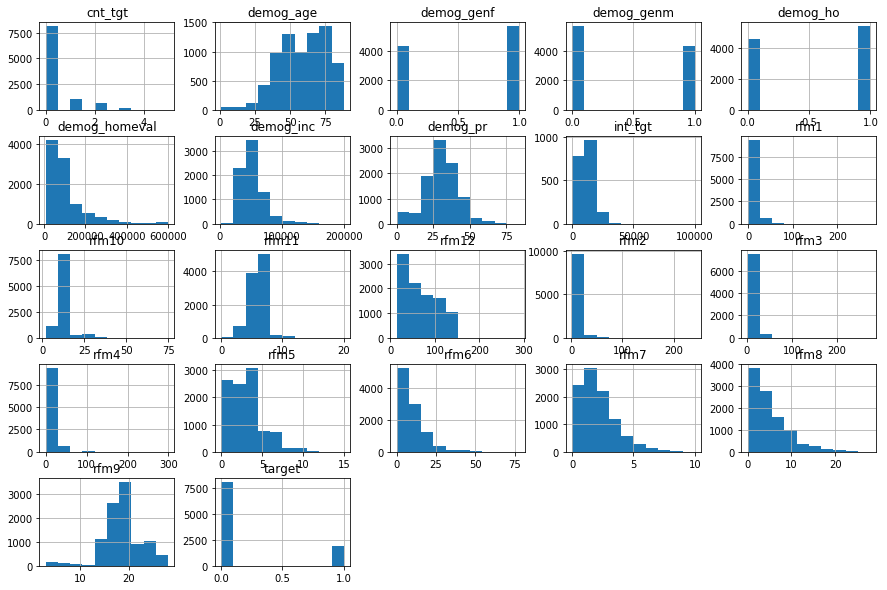

In [10]:
bank.hist(figsize = (15, 10));

# Correlação entre Variáveis

In [11]:
bank.correlation()['Correlation']

,Variable,cnt_tgt,demog_age,demog_ho,demog_pr,int_tgt,demog_homeval,demog_inc,rfm1,rfm2,...,Nobs13,Nobs14,Nobs15,Nobs16,Nobs17,Nobs18,Nobs19,Nobs20,Nobs21,Nobs22
0,cnt_tgt,1.000000,0.051292,-0.010121,0.000795,-0.103455,0.130231,0.068149,-0.132165,-0.218569,...,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0
1,demog_age,0.051292,1.000000,-0.029747,0.094259,-0.019889,-0.010475,-0.065517,-0.029967,-0.069982,...,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0
2,demog_ho,-0.010121,-0.029747,1.000000,0.075389,0.007759,0.043352,0.100970,-0.000986,0.002180,...,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0
3,demog_pr,0.000795,0.094259,0.075389,1.000000,-0.010615,-0.056288,-0.038618,-0.011524,-0.033689,...,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0
4,int_tgt,-0.103455,-0.019889,0.007759,-0.010615,1.000000,0.017058,0.025766,0.396097,0.318374,...,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0
5,demog_homeval,0.130231,-0.010475,0.043352,-0.056288,0.017058,1.000000,0.620252,0.057236,0.117262,...,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0
6,demog_inc,0.068149,-0.065517,0.100970,-0.038618,0.025766,0.620252,1.000000,0.063584,0.096123,...,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0
7,rfm1,-0.132165,-0.029967,-0.000986,-0.011524,0.396097,0.057236,0.063584,1.000000,0.635554,...,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0
8,rfm2,-0.218569,-0.069982,0.002180,-0.033689,0.318374,0.117262,0.096123,0.635554,1.000000,...,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0
9,rfm3,-0.138973,-0.043354,0.001554,-0.015338,0.281172,0.062367,0.091528,0.881384,0.634108,...,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0


# Correlação com a Target

In [12]:
bank.correlation()['Correlation'][['Variable','target']]

,Variable,target
0,cnt_tgt,0.892451
1,demog_age,0.055459
2,demog_ho,-0.002842
3,demog_pr,0.000716
4,int_tgt,NaN
5,demog_homeval,0.194501
6,demog_inc,0.109916
7,rfm1,-0.121623
8,rfm2,-0.206869
9,rfm3,-0.129962


# Particionamento Estratificado dos Dados

In [13]:
bank.groupby('target') \
    .stratified(output={'casOut':{'caslib':'BANKS', 'name':'BANK_PART', 'replace':True}, 'copyVars':'ALL'},
                samppct=70,
                partind=True)

NOTE: Using SEED=1323058406 for sampling.


[outputSize]

 {'outputNObs': 1060038.0, 'outputNVars': 26}

[STRAFreq]

 Frequencies
 
    ByGrpID        target    NObs   NSamp
 0        0             0  848529  593970
 1        1             1  211509  148056

[OutputCasTables]

   casLib       Name Label     Rows  Columns  \
 0  BANKS  BANK_PART        1060038       26   
 
                                 casTable  
 0  CASTable('BANK_PART', caslib='BANKS')  

+ Elapsed: 0.342s, user: 2.11s, sys: 0.246s, mem: 50.5mb

In [14]:
part = sas.CASTable(caslib='BANKS', name='BANK_PART')

# Separação das Variáveis

In [15]:
columns_info = part.columninfo()['ColumnInfo']

In [16]:
vars_cat = columns_info['Column'][columns_info['Type']=='char'].tolist()
vars_cat.remove('account')
print(vars_cat)

['cat_input1', 'cat_input2']


In [17]:
vars_num = columns_info['Column'][columns_info['Type']=='double'].tolist()
vars_num.remove("_PartInd_")
vars_num.remove("int_tgt")
vars_num.remove("cnt_tgt")
vars_num.remove("target")
print(vars_num)

['demog_age', 'demog_ho', 'demog_pr', 'demog_homeval', 'demog_inc', 'rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12', 'demog_genf', 'demog_genm']


In [18]:
target = "target"

# Imputação

In [19]:
part.info()

CASTable('BANK_PART', caslib='BANKS')
Data columns (total 26 columns):
                     N   Miss    Type
cat_input1     1060038  False    char
cat_input2     1060038  False    char
cnt_tgt        1060037   True  double
demog_age       793177   True  double
demog_ho       1060038  False  double
demog_pr       1060038  False  double
int_tgt         211509   True  double
demog_homeval  1047905   True  double
demog_inc       806785   True  double
rfm1           1060038  False  double
rfm2           1060038  False  double
rfm3            834252   True  double
rfm4           1060038  False  double
rfm5           1060038  False  double
rfm6           1060038  False  double
rfm7           1060038  False  double
rfm8           1060038  False  double
rfm9           1060038  False  double
rfm10          1060038  False  double
rfm11          1060038  False  double
rfm12          1060038  False  double
demog_genf     1060038  False  double
demog_genm     1060038  False  double
account        10

In [20]:
part.impute(casout={"caslib":"BANKS", "name":"BANK_PART_TRAT", "replace":True},
            methodnominal="mode",
            methodinterval ="median",
            outvarsnameprefix='')

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
0,cat_input1,Mode,cat_input1,1060038.0,0.0,NaN,X
1,cat_input2,Mode,cat_input2,1060038.0,0.0,NaN,E
2,cnt_tgt,Median,cnt_tgt,1060037.0,1.0,0.00,
3,demog_age,Median,demog_age,793177.0,266861.0,60.00,
4,demog_ho,Median,demog_ho,1060038.0,0.0,1.00,
5,demog_pr,Median,demog_pr,1060038.0,0.0,31.00,
6,int_tgt,Median,int_tgt,211509.0,848529.0,10000.00,
7,demog_homeval,Median,demog_homeval,1047905.0,12133.0,74473.00,
8,demog_inc,Median,demog_inc,806785.0,253253.0,48779.00,
9,rfm1,Median,rfm1,1060038.0,0.0,15.00,


In [21]:
abt = sas.CASTable(caslib='BANKS', name='BANK_PART_TRAT')

In [22]:
abt.info()

CASTable('BANK_PART_TRAT', caslib='BANKS')
Data columns (total 26 columns):
                     N   Miss    Type
_PartInd_      1060038  False  double
cnt_tgt        1060038  False  double
demog_age      1060038  False  double
demog_genf     1060038  False  double
demog_genm     1060038  False  double
demog_ho       1060038  False  double
demog_homeval  1060038  False  double
demog_inc      1060038  False  double
demog_pr       1060038  False  double
int_tgt        1060038  False  double
rfm1           1060038  False  double
rfm10          1060038  False  double
rfm11          1060038  False  double
rfm12          1060038  False  double
rfm2           1060038  False  double
rfm3           1060038  False  double
rfm4           1060038  False  double
rfm5           1060038  False  double
rfm6           1060038  False  double
rfm7           1060038  False  double
rfm8           1060038  False  double
rfm9           1060038  False  double
target         1060038  False  double
account     

# Treino dos Modelos

### Parâmetros Comuns

In [45]:
def get_train_params(name):
    return {'table'    : abt[abt['_PartInd_']==0],
            'inputs'   : vars_num+vars_cat,
            'target'   : target,
            'nominals' : vars_cat+[target],
            'casout'   : {'name':name+'_model', 'replace':True}}

In [46]:
def get_score_params(name):
    return {'table'      : abt[abt['_PartInd_']==1],
            'modeltable' : name+'_model',
            'copyVars'   : target,
            'casout'     : {'name':name+'_score', 'replace':True}}

### Árvore de Decisão

In [47]:
sas.decisionTree.dtreeTrain(**get_train_params('dt'),
                            varImp = True)

sas.decisiontree.dtreescore(**get_score_params('dt'))

[OutputCasTables]

              casLib      Name    Rows  Columns  \
 0  CASUSER(sasdemo)  dt_score  742026       13   
 
                                           casTable  
 0  CASTable('dt_score', caslib='CASUSER(sasdemo)')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                            742026
 1  Number of Observations Used                            742026
 2  Misclassification Error (%)                      19.285577594

+ Elapsed: 0.223s, user: 1.04s, sys: 0.12s, mem: 44.7mb

### Random Forest

In [48]:
sas.decisionTree.forestTrain(**get_train_params('rf'),
                             varImp = True)

sas.decisiontree.forestscore(**get_score_params('rf'))

[OutputCasTables]

              casLib      Name    Rows  Columns  \
 0  CASUSER(sasdemo)  rf_score  742026        6   
 
                                           casTable  
 0  CASTable('rf_score', caslib='CASUSER(sasdemo)')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                            742026
 1  Number of Observations Used                            742026
 2  Misclassification Error (%)                      19.454574368

+ Elapsed: 0.992s, user: 8.11s, sys: 0.067s, mem: 37.6mb

### Gradient Boosting

In [49]:
sas.decisionTree.gbtreeTrain(**get_train_params('gb'), 
                             varImp = True)

sas.decisiontree.gbtreescore(**get_score_params('gb'))

[OutputCasTables]

              casLib      Name    Rows  Columns  \
 0  CASUSER(sasdemo)  gb_score  742026        5   
 
                                           casTable  
 0  CASTable('gb_score', caslib='CASUSER(sasdemo)')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                            742026
 1  Number of Observations Used                            742026
 2  Misclassification Error (%)                      14.465665624

[ErrorMetricInfo]

     TreeID  Trees  NLeaves       MCR   LogLoss       ASE      RASE     MAXAE
 0      0.0    1.0     16.0  0.199529  0.474256  0.151150  0.388780  0.815692
 1      1.0    2.0     32.0  0.199529  0.454811  0.144240  0.379789  0.829897
 2      2.0    3.0     48.0  0.199529  0.439032  0.138480  0.372129  0.842569
 3      3.0    4.0     64.0  0.199529  0.426012  0.133695  0.365643  0.854262
 4      4.0    5.0     80.0  0.199529  0.414687  0.129573  0.359963  0.865314
 5      5.0    6.0     96.0  0.199529  0.405043  0.126055  0.355042  0.875194
 6      6.0    7.0    112.0  0.194838  0.396690  0.123106  0.350864  0.884783
 7      7.0    8.0    128.0  0.186458  0.389500  0.120600  0.347276  0.893532
 8      8.0    9.0    144.0  0.178728  0.383312  0.118428  0.344134  0.901760
 9      9.0   10.0    160.0  0.172289  0.377885  0.116625  0.341503  0.909115
 10    10.0   11.0    176.0  0.168119  0.373167  0.115075  0.339228  0.914887
 11    11.0   12.0    192.0  0.163899  0.368897  0.113676  0.337159  0.920974
 12    12.0   13.0    208.0  0.159598  0.365071  0.112471  0.335367  0.926595
 13    13.0   14.0    224.0  0.157290  0.361756  0.111442  0.333829  0.931470
 14    14.0   15.0    240.0  0.154577  0.358902  0.110564  0.332511  0.936155
 15    15.0   16.0    256.0  0.153387  0.356260  0.109795  0.331353  0.940464
 16    16.0   17.0    272.0  0.152243  0.353953  0.109106  0.330312  0.944606
 17    17.0   18.0    288.0  0.151604  0.351817  0.108455  0.329326  0.948188
 18    18.0   19.0    304.0  0.150896  0.349865  0.107890  0.328466  0.951248
 19    19.0   20.0    320.0  0.150222  0.348285  0.107455  0.327803  0.954124
 20    20.0   21.0    336.0  0.149158  0.346707  0.106989  0.327091  0.956864
 21    21.0   22.0    352.0  0.148444  0.345188  0.106551  0.326422  0.959455
 22    22.0   23.0    368.0  0.148089  0.343949  0.106228  0.325926  0.961980
 23    23.0   24.0    384.0  0.147825  0.342815  0.105948  0.325497  0.964462
 24    24.0   25.0    400.0  0.147340  0.341729  0.105666  0.325062  0.966764
 25    25.0   26.0    416.0  0.147128  0.340769  0.105404  0.324660  0.968558
 26    26.0   27.0    432.0  0.146886  0.339838  0.105149  0.324267  0.970567
 27    27.0   28.0    448.0  0.146515  0.339054  0.104956  0.323969  0.972005
 28    28.0   29.0    464.0  0.146440  0.338382  0.104793  0.323718  0.974398
 29    29.0   30.0    480.0  0.146177  0.337675  0.104580  0.323389  0.975632
 30    30.0   31.0    496.0  0.146131  0.337103  0.104434  0.323163  0.976557
 31    31.0   32.0    512.0  0.145882  0.336552  0.104280  0.322925  0.977121
 32    32.0   33.0    528.0  0.145748  0.336031  0.104141  0.322708  0.978220
 33    33.0   34.0    544.0  0.145556  0.335529  0.104017  0.322517  0.979192
 34    34.0   35.0    560.0  0.145550  0.335109  0.103920  0.322366  0.980170
 35    35.0   36.0    576.0  0.145530  0.334727  0.103820  0.322211  0.981077
 36    36.0   37.0    592.0  0.145413  0.334387  0.103740  0.322086  0.982051
 37    37.0   38.0    608.0  0.145446  0.334019  0.103640  0.321931  0.982721
 38    38.0   39.0    624.0  0.145267  0.333713  0.103570  0.321823  0.983453
 39    39.0   40.0    640.0  0.145201  0.333418  0.103493  0.321703  0.984037
 40    40.0   41.0    656.0  0.145136  0.333146  0.103417  0.321585  0.984477
 41    41.0   42.0    672.0  0.145012  0.332867  0.103331  0.321452  0.984875
 42    42.0   43.0    688.0  0.144906  0.332652  0.103279  0.321370  0.985598
 43    43.0   44.0    704.0  0.144938  

### Neural Network

In [50]:
sas.neuralNet.annTrain(**get_train_params('nn'))

sas.neuralnet.annscore(**get_score_params('nn'))

[OutputCasTables]

              casLib      Name    Rows  Columns  \
 0  CASUSER(sasdemo)  nn_score  742026        3   
 
                                           casTable  
 0  CASTable('nn_score', caslib='CASUSER(sasdemo)')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                            742026
 1  Number of Observations Used                            742026
 2  Misclassification Error (%)                      15.934212548

+ Elapsed: 0.212s, user: 1.26s, sys: 0.031s, mem: 36.3mb

# Auto Tuning

In [55]:
sas.autotune.tunegradientboosttree(
    trainOptions={
         "table"    : abt[abt['_PartInd_']==0],
         "inputs"   : vars_num+vars_cat,
         "target"   : target,
         "nominals" : vars_cat+[target],
         "casout"   : {"name":"gbauto_model", "caslib": "BANKS", "replace":True }
    },
    tunerOptions={
         "maxIters": 2,
         "maxTime": 180,
         "maxEvals": 2,
         "searchMethod": "LHS",
         "objective": "AUC",
         "userDefinedPartition": True,
         "targetEvent" : "1", 
    },
    scoreOptions = {
        "table": abt[abt['_PartInd_']==1],
        "modeltable": {"name":"gbauto_model", "caslib": "BANKS"},
        "casout": {"name":"gbauto_score", "caslib": "BANKS", "replace":True},
        "copyvars":["account", "target"]
    }

)

NOTE: Autotune is started for 'Gradient Boosting Tree' model.
NOTE: Autotune option SEARCHMETHOD='LHS'.
NOTE: Autotune option MAXTIME=180 (sec.).
NOTE: Autotune option SEED=1015899658.
NOTE: Autotune objective is 'Area Under Curve'.
NOTE: Early stopping is activated; 'NTREE' will not be tuned.
NOTE: Autotune number of parallel evaluations is set to 4, each using 0 worker nodes.
NOTE: Automatic early stopping is activated with STAGNATION=4;  set EARLYSTOP=false to deactivate.
         Iteration       Evals     Best Objective  Elapsed Time
                 0           1             0.8211          8.99
                 1           7             0.8211        180.00
NOTE: Autotune process reached maximum tuning time.
NOTE: Autotune time is 191.06 seconds.


,Descr,Value
0,Number of Trees,1.500000e+02
1,Distribution,2.000000e+00
2,Learning Rate,1.000000e-01
3,Subsampling Rate,5.000000e-01
4,Number of Selected Variables (M),2.100000e+01
5,Number of Bins,5.000000e+01
6,Number of Variables,2.100000e+01
7,Max Number of Tree Nodes,3.100000e+01
8,Min Number of Tree Nodes,3.100000e+01
9,Max Number of Branches,2.000000e+00


In [56]:
sas.CASTable(name="gbauto_score", caslib="BANKS").head()

,account,target,I_target,_MissIt_,P_target1,P_target0
0,100249788,0.0,0,0.0,0.184221,0.815779
1,100249789,0.0,0,0.0,0.184221,0.815779
2,100249790,0.0,0,0.0,0.201495,0.798505
3,100249791,1.0,0,1.0,0.184221,0.815779
4,100249794,0.0,0,0.0,0.184221,0.815779


# Encerra a sessão do SAS Viya

In [57]:
sas.terminate()